In [1]:
#Wrangling
import pandas as pd
import numpy as np

#Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Getting the zillow data in shape
import wrangle_zillow

Zillow
Create a python script or jupyter notebook named explore_zillow that does the following:
1)Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.
2)Plot a correlation matrix heatmap.
3)Plot latitude agains longitude.
4)Create a useable plot with 4 dimensions, e.g. x, y, color, size.
5)Compute the mean(logerror) by zipcode and the overall mean(logerror). 6)Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
#import our cleaned up data
df_zillow=wrangle_zillow.wrangle_zillow_data()
df_zillow.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,3101.0,96330.0,0.0,1970.0,145143.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Central
6,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,47019.0,3101.0,96293.0,0.0,1950.0,773303.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,Central
8,3.0,4.0,3039.0,6037.0,33960230.0,-118006914.0,20028.0,14634.0,3101.0,96173.0,0.0,1970.0,220583.0,3104.19,6.037500e+13,-0.040966,2017-01-02,Single Family Residential,Central
10,3.0,4.0,2540.0,6037.0,34434971.0,-118464390.0,10384.0,54311.0,3101.0,96374.0,0.0,1999.0,430108.0,6103.36,6.037920e+13,0.005963,2017-01-02,Single Family Residential,Central
18,1.0,2.0,1146.0,6037.0,34024040.0,-118159090.0,4657.0,17882.0,3101.0,96003.0,0.0,1939.0,273745.0,3739.02,6.037532e+13,-0.035085,2017-01-02,Single Family Residential,Floor/Wall


In [3]:
#before we start graphing we need to change the fips,regionidcity,regionidcounty,regionidzip
#and censustractandblock into categorical variables
df_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32813 entries, 3 to 77380
Data columns (total 19 columns):
bathroomcnt                     32813 non-null float64
bedroomcnt                      32813 non-null float64
calculatedfinishedsquarefeet    32813 non-null float64
fips                            32813 non-null float64
latitude                        32813 non-null float64
longitude                       32813 non-null float64
lotsizesquarefeet               32813 non-null float64
regionidcity                    32813 non-null float64
regionidcounty                  32813 non-null float64
regionidzip                     32813 non-null float64
roomcnt                         32813 non-null float64
yearbuilt                       32813 non-null float64
taxvaluedollarcnt               32813 non-null float64
taxamount                       32813 non-null float64
censustractandblock             32813 non-null float64
logerror                        32813 non-null float64
transaction

In [4]:
#We dropped all the Ventura County properties based on our previous criteria
for col in ['fips', 'regionidcity', 'regionidcounty', 'regionidzip','censustractandblock']:
    df_zillow[col] = df_zillow[col].astype('object')[:-1]
df_zillow.fips.unique()    

array([6037.0, 6059.0, nan], dtype=object)

In [5]:
#Change the fips to the corresponding county name
df_zillow['fips']=df_zillow[['fips']].replace({6037.0:'Los_Angeles_County',6059.0:'Orange_County'})

In [6]:
df_zillow.fips.unique()

array(['Los_Angeles_County', 'Orange_County', nan], dtype=object)

1)Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [7]:
num_cols=list(df_zillow.select_dtypes('number'))
num_cols.remove('longitude')
num_cols.remove('latitude')

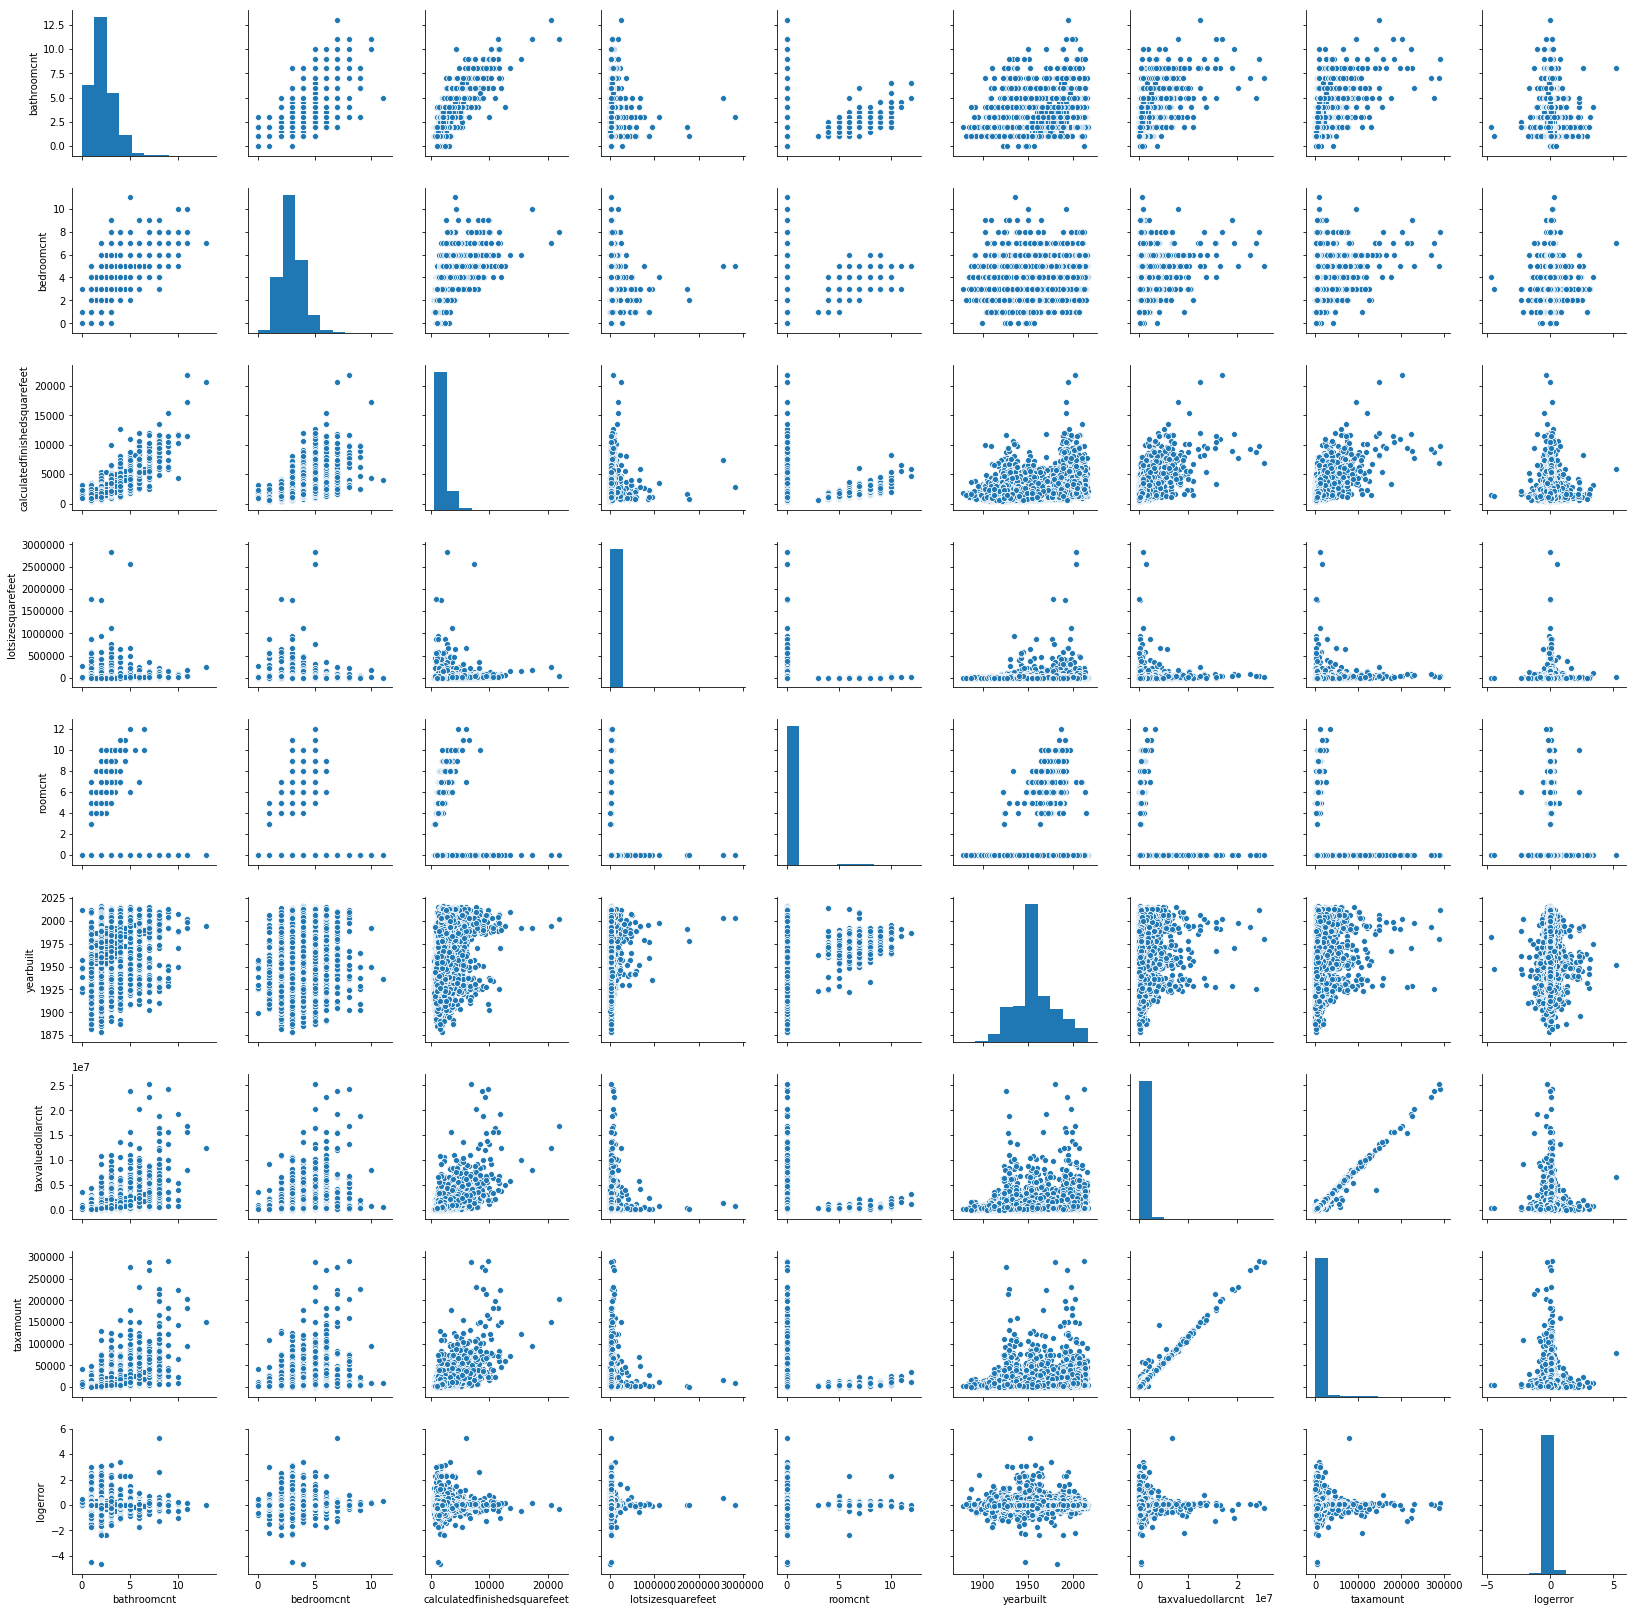

In [8]:
sns.pairplot(df_zillow[num_cols])
plt.show()

2)Plot a correlation matrix heatmap.

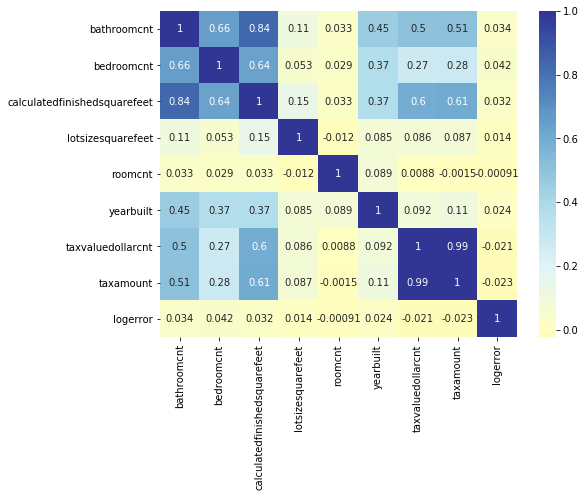

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df_zillow[num_cols].corr(), cmap='RdYlBu', annot=True, center=0)

3)Plot latitude against longitude.

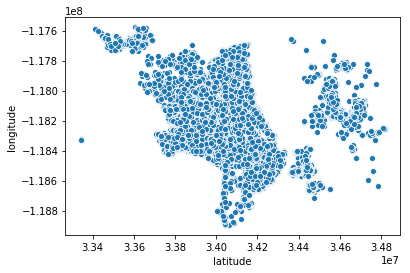

In [10]:
sns.scatterplot(x='latitude',y='longitude',data=df_zillow)
plt.show()

4)Create a useable plot with 4 dimensions, e.g. x, y, color, size.

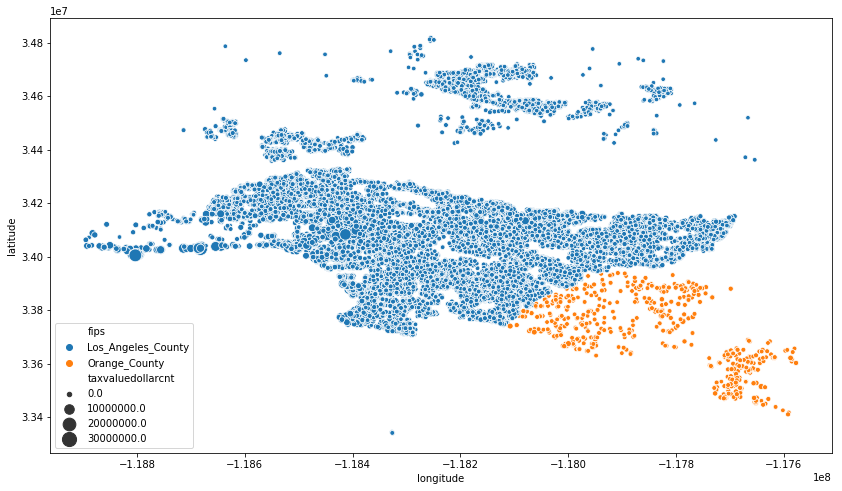

In [19]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude',y='latitude',hue='fips',size='taxvaluedollarcnt',sizes=(20,200),data=df_zillow)
plt.legend()
plt.show()


5)Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [20]:
overall_mean=df_zillow.logerror.mean()
zips_errors=df_zillow.groupby('regionidzip')['regionidzip','logerror'].mean().reset_index()
zips_errors

,regionidzip,logerror
0,95982.0,0.006566
1,95983.0,0.005311
2,95984.0,-0.073108
3,95985.0,-0.035761
4,95986.0,-0.014590
5,95987.0,0.003764
6,95988.0,0.042105
7,95989.0,-0.027778
8,95992.0,0.001443
9,95993.0,-0.087990


In [13]:
zips_errors['regionidzip']=zips_errors.regionidzip.astype('object')
#zips_errors.set_index('regionidzip',inplace=True)
zips_errors.head()

,regionidzip,logerror
0,95982,0.006566
1,95983,0.005311
2,95984,-0.073108
3,95985,-0.035761
4,95986,-0.014590


In [14]:
import scipy as sp
zip_list=[]
for zips in df_zillow.regionidzip.unique():
    if sp.stats.ttest_ind(df_zillow[df_zillow.regionidzip ==zips].logerror,
    df_zillow[df_zillow.regionidzip!=zips].logerror)[-1] <0.05:
        zip_list.append(zips)
    

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
#zip codes with significant p-values
zip_list

[96237.0,
 96349.0,
 96450.0,
 96464.0,
 96517.0,
 96387.0,
 95984.0,
 96280.0,
 96426.0,
 96020.0,
 96137.0,
 96197.0,
 95993.0,
 96004.0,
 96013.0,
 96001.0,
 96027.0,
 96228.0,
 96379.0,
 96134.0,
 96047.0,
 96030.0,
 95985.0,
 96046.0,
 96022.0,
 96019.0,
 96508.0,
 96005.0,
 95989.0,
 96120.0,
 96119.0,
 96007.0,
 96480.0,
 96961.0,
 96043.0,
 96207.0,
 96322.0,
 96042.0,
 96097.0,
 96186.0,
 97324.0,
 97027.0,
 96002.0,
 97067.0]

6)Is logerror significantly different for properties in LA County vs Orange County vs Ventura Count

In [16]:
#Log error does not appear to be statistically significant since p-value is greater than 0.05
sp.stats.ttest_ind(df_zillow[df_zillow.fips =='Los_Angeles_County'].logerror,
    df_zillow[df_zillow.fips=='Orange_County'].logerror)

Ttest_indResult(statistic=0.30951597334126085, pvalue=0.7569310288903016)